In [1]:
import pandas as pd
import missingno as msno
from pathlib import Path
import missingno as msno
import datetime

import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [9]:
output_dir = Path("./output/")
stn_files = output_dir.glob("U*.parquet")  # get only GHCND stations
dfs = [pd.read_parquet(i) for i in stn_files]

stn_data = []

for df in dfs:
    df.index = df["date"]
    # df = df[~df.index.duplicated()]
    # df = df[['station','value']]

    stn = str(df["station"].iloc[0])  # get station as str
    df = df.pivot(columns="datatype", values=["value"])  # pivot to colsz

    df = df.asfreq("D")  # set to monotonic index
    df.columns = df.columns.droplevel(0)
    df["station"] = stn  # reassign station
    stn_data.append(df)

In [11]:
for df in stn_data:
    print(f"vars available at {df['station'].iloc[0]}")
    print(df.columns.values)
    print()

vars available at GHCND:US1CASB0020
['PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USW00023243
['AWND' 'PGTM' 'PRCP' 'TMAX' 'TMIN' 'WDF2' 'WDF5' 'WSF2' 'WSF5' 'WT01'
 'WT02' 'WT03' 'WT08' 'station']

vars available at GHCND:USC00045064
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'TOBS' 'WT01' 'WT03'
 'WT04' 'WT05' 'WT06' 'WT11' 'station']

vars available at GHCND:USC00047016
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USR0000CVND
['TAVG' 'TMAX' 'TMIN' 'station']

vars available at GHCND:US1CASB0002
['PRCP' 'SNOW' 'station']

vars available at GHCND:US1CASB0007
['PRCP' 'SNOW' 'SNWD' 'station']

vars available at GHCND:USC00047681
['MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'WT03' 'station']

vars available at GHCND:USC00045107
['DAPR' 'MDPR' 'PRCP' 'SNOW' 'SNWD' 'TMAX' 'TMIN' 'TOBS' 'WT01' 'WT03'
 'WT04' 'WT05' 'WT11' 'station']



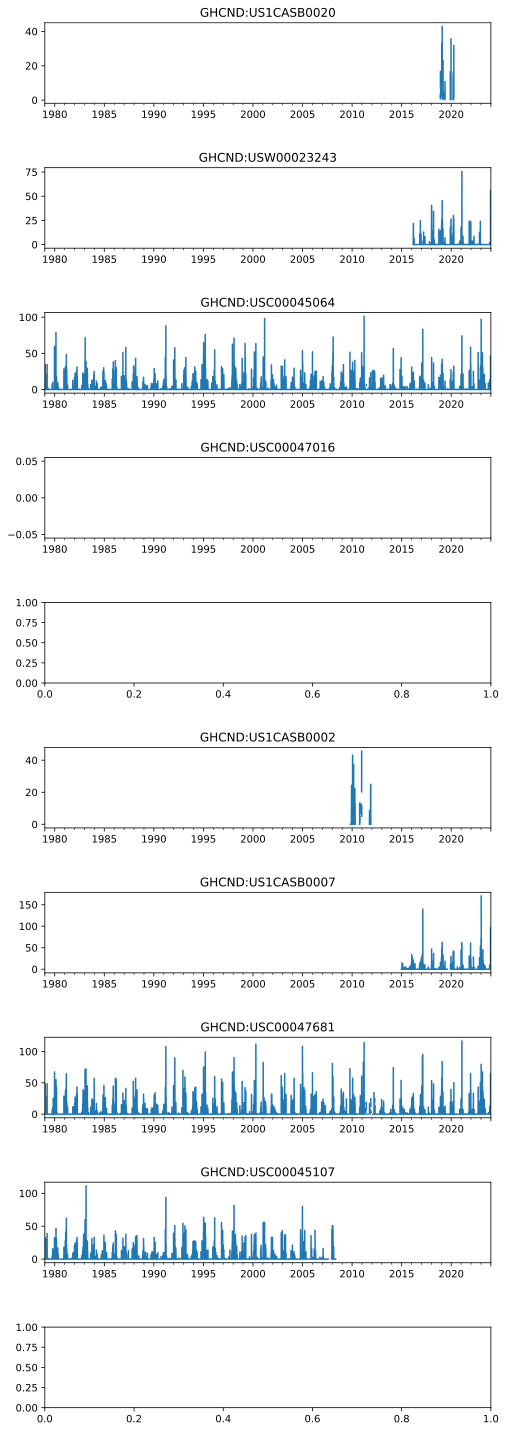

In [13]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8, 25))
plt.subplots_adjust(hspace=0.8)

full_index = pd.date_range(start="1979-01-01", end="2024-01-01", freq="d")

for i in range(len(dfs)):
    try:  # some sites don't have precip
        stn_data[i]["PRCP"].reindex(full_index).plot(
            ax=axes[i], title=stn_data[i].iloc[0]["station"]
        )
    except:
        continue

# PRECIP
# 5 of 9 sites have reasonable looking precip. of those, only 3 have a long record.

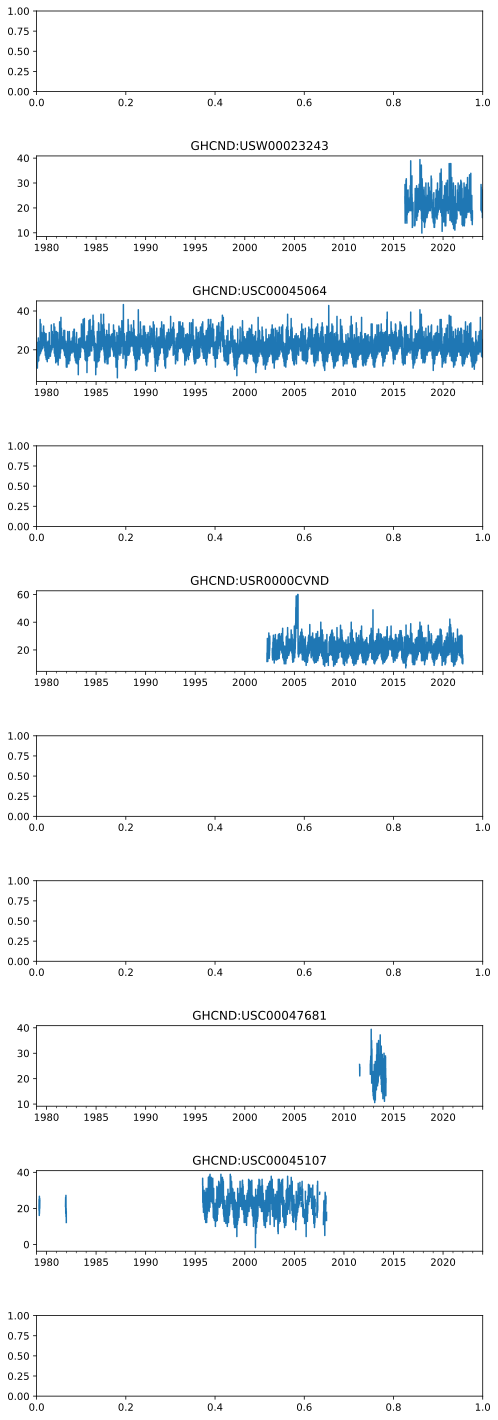

In [14]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(8, 25))
plt.subplots_adjust(hspace=0.8)

full_index = pd.date_range(start="1979-01-01", end="2024-01-01", freq="d")

for i in range(len(dfs)):
    try:  # some sites don't have precip
        stn_data[i]["TMAX"].reindex(full_index).plot(
            ax=axes[i], title=stn_data[i].iloc[0]["station"]
        )
    except:
        continue

# only a cople of sites with TMAX

## QC Stations with useful POR

In [45]:
# GHCND:USC00045064
stn = stn_data[2].dropna(axis=1, how="all")  # drop cols with all na
stn = stn[["PRCP", "TMAX", "TMIN", "TOBS", "station"]]
# stn_data[2].plot(subplots=True, figsize=(12,22))

stn = stn.asfreq("d")  # verify monotonic

# save QC version
start = stn.index.min().strftime("%Y%m%d")
end = stn.index.max().strftime("%Y%m%d")

stn.to_parquet(f"./output/qc/{stn['station'].iloc[0]}_{start}_{end}.parquet")

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

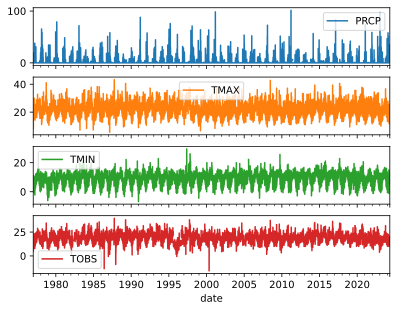

In [46]:
stn.plot(subplots=True)

In [62]:
# GHCND:USR0000CVND
stn = stn_data[4].dropna(axis=1, how="all")  # drop cols with all na
# stn = stn[['PRCP', 'TMAX', 'TMIN', 'TOBS', 'station']]
# stn_data[2].plot(subplots=True, figsize=(12,22))

stn = stn.asfreq("d")  # verify monotonic

# save QC version
start = stn.index.min().strftime("%Y%m%d")
end = stn.index.max().strftime("%Y%m%d")

stn.to_parquet(f"./output/qc/{stn['station'].iloc[0]}_{start}_{end}.parquet")

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

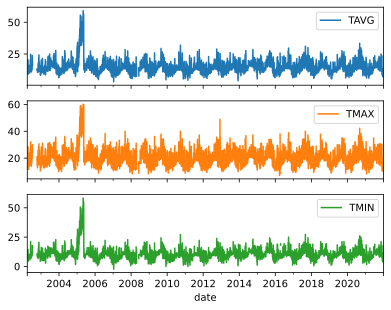

In [60]:
stn.plot(subplots=True)